# AM217 Patterns in Fluids
## 2.1 Numerical Simulations 
----------
***

### 1D Linear Convection

The 1-D Linear Convection equation is the simplest model to build an understanding towards numerical simulations of the Navier-Stokes equation. 

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

### Simple discretisation

Lets discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

From the definition of a derivative (and simply removing the limit):

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Our discrete equation, then, is:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$


In [1]:
# Load relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time, sys   
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [53]:
# Declare some constants

nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 15    #nt is the number of timesteps we want to calculate
dt = .075  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [54]:
u = np.ones(nx)      # set everything to 1
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

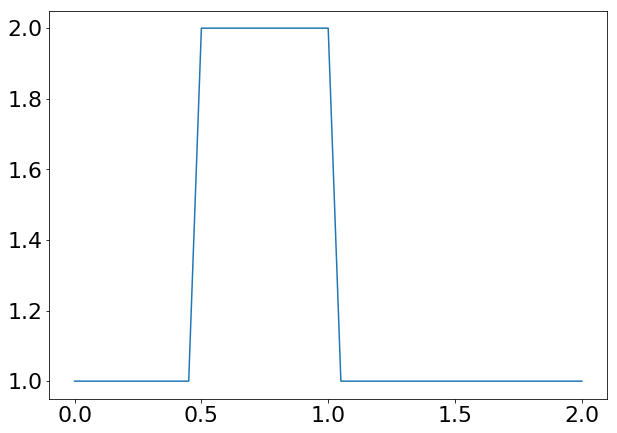

In [55]:
fig = plt.figure(1,figsize=(10,10/1.4))
plt.plot(np.linspace(0, 2, nx), u);

### Discretise convection equation using finite-difference

Hat function is not perfect !

For every element of our array `u`, we need to perform the operation $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has convected.  
We first initialize our placeholder array `un` to hold the values we calculate for the $n+1$ timestep


In [56]:
# numerically inefficient; sufficient for this simple example

un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

Now plotting after $u$ has been updated in space and time 

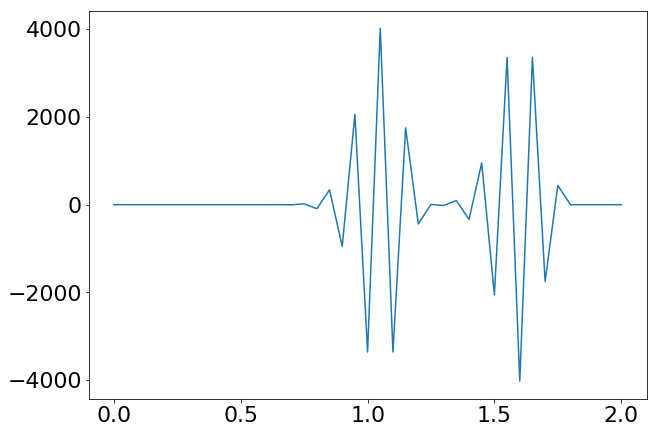

In [57]:
fig = plt.figure(1,figsize=(10,10/1.4))
plt.plot(np.linspace(0, 2, nx), u);

### 1D Non-linear convection

Same as before, but now introducing non-linearity.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

In [21]:
#Declare constants

nx = 41
dx = 2 / (nx - 1)
nt = 20    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

In [22]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):  ##now we'll iterate through the u array
          
            u[i]=un[i]-un[i]* dt/dx * (un[i]-un[i-1])

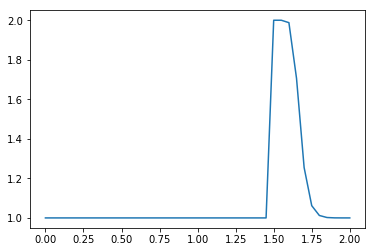

In [23]:
plt.plot(numpy.linspace(0, 2, nx), u) ##Plot the results